In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('SARIMA Forecasting Table.csv')

In [4]:
df.head()

,Month_Year,Total_Sales
0,1/31/2021,14518.06
1,2/28/2021,4519.92
2,3/31/2021,56933.93
3,4/30/2021,28295.35
4,5/31/2021,26319.74


In [5]:
df.dtypes

Month_Year      object
Total_Sales    float64
dtype: object

In [6]:
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format='%m/%d/%Y')
print(df)

   Month_Year  Total_Sales
0  2021-01-31     14518.06
1  2021-02-28      4519.92
2  2021-03-31     56933.93
3  2021-04-30     28295.35
4  2021-05-31     26319.74
5  2021-06-30     34669.47
6  2021-07-31     33946.37
7  2021-08-31     28918.33
8  2021-09-30     82670.41
9  2021-10-31     32413.32
10 2021-11-30     78826.97
11 2021-12-31     72008.32
12 2022-01-31     18461.92
13 2022-02-28     11951.40
14 2022-03-31     39978.64
15 2022-04-30     34195.25
16 2022-05-31     30246.98
17 2022-06-30     24797.30
18 2022-07-31     28765.31
19 2022-08-31     37056.98
20 2022-09-30     64627.00
21 2022-10-31     31407.11
22 2022-11-30     75972.49
23 2022-12-31     75532.54
24 2023-01-31     18830.36
25 2023-02-28     22978.82
26 2023-03-31     53031.05
27 2023-04-30     38829.14
28 2023-05-31     57042.85
29 2023-06-30     40937.12
30 2023-07-31     40300.51
31 2023-08-31     31716.79
32 2023-09-30     73521.71
33 2023-10-31     59831.02
34 2023-11-30     79412.00
35 2023-12-31     97502.30
3

In [7]:
df.dtypes

Month_Year     datetime64[ns]
Total_Sales           float64
dtype: object

In [8]:
df.columns = ['ds','y']

In [9]:
df.head()

,ds,y
0,2021-01-31,14518.06
1,2021-02-28,4519.92
2,2021-03-31,56933.93
3,2021-04-30,28295.35
4,2021-05-31,26319.74


In [10]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

10:16:09 - cmdstanpy - INFO - Chain [1] start processing
10:16:10 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=60, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-31,2300.373962,1117.715013,26540.931457,2300.373962,2300.373962,12110.504388,12110.504388,12110.504388,36782.766315,36782.766315,36782.766315,-24672.261927,-24672.261927,-24672.261927,0.0,0.0,0.0,14410.878350
1,2021-02-28,2605.415262,-6448.353950,20078.249324,2605.415262,2605.415262,3803.157967,3803.157967,3803.157967,36782.766315,36782.766315,36782.766315,-32979.608348,-32979.608348,-32979.608348,0.0,0.0,0.0,6408.573230
2,2021-03-31,2943.139560,33207.741019,60590.647630,2943.139560,2943.139560,43955.178885,43955.178885,43955.178885,36782.766315,36782.766315,36782.766315,7172.412570,7172.412570,7172.412570,0.0,0.0,0.0,46898.318445
3,2021-04-30,3269.969525,12691.606838,38111.504493,3269.969525,3269.969525,22284.918228,22284.918228,22284.918228,36782.766315,36782.766315,36782.766315,-14497.848087,-14497.848087,-14497.848087,0.0,0.0,0.0,25554.887753
4,2021-05-31,3607.693821,15984.010815,41927.505585,3607.693821,3607.693821,24740.334158,24740.334158,24740.334158,36782.766315,36782.766315,36782.766315,-12042.432157,-12042.432157,-12042.432157,0.0,0.0,0.0,28348.027979


In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2029-08-31,76271.314494,87607.397176,119120.021598,65625.693800,85693.716935,27204.668819,27204.668819,27204.668819,36782.766315,36782.766315,36782.766315,-9578.097496,-9578.097496,-9578.097496,0.0,0.0,0.0,103475.983312
104,2029-09-30,77077.294268,121622.282887,155668.530074,66148.795455,86750.557834,61663.616705,61663.616705,61663.616705,36782.766315,36782.766315,36782.766315,24880.850390,24880.850390,24880.850390,0.0,0.0,0.0,138740.910973
105,2029-10-31,77910.140034,97006.326846,131757.229032,66595.664721,87859.021331,36310.896225,36310.896225,36310.896225,36782.766315,36782.766315,36782.766315,-471.870090,-471.870090,-471.870090,0.0,0.0,0.0,114221.036259
106,2029-11-30,78716.119808,136555.358405,169979.929514,67058.259737,88965.375440,75022.819218,75022.819218,75022.819218,36782.766315,36782.766315,36782.766315,38240.052903,38240.052903,38240.052903,0.0,0.0,0.0,153738.939026
107,2029-12-31,79548.965575,124872.101198,156993.141864,67601.147417,90072.415000,61835.373027,61835.373027,61835.373027,36782.766315,36782.766315,36782.766315,25052.606712,25052.606712,25052.606712,0.0,0.0,0.0,141384.338602


In [13]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2021-01-31,14410.878350
1,2021-02-28,6408.573230
2,2021-03-31,46898.318445
3,2021-04-30,25554.887753
4,2021-05-31,28348.027979
...,...,...
103,2029-08-31,103475.983312
104,2029-09-30,138740.910973
105,2029-10-31,114221.036259
106,2029-11-30,153738.939026


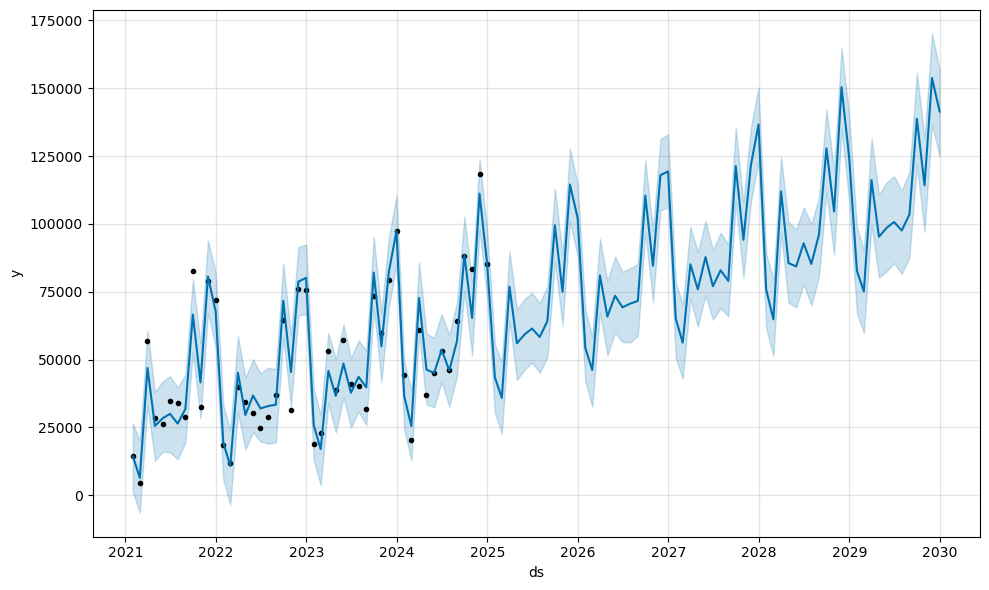

In [14]:
plot1 = m.plot(forecast)

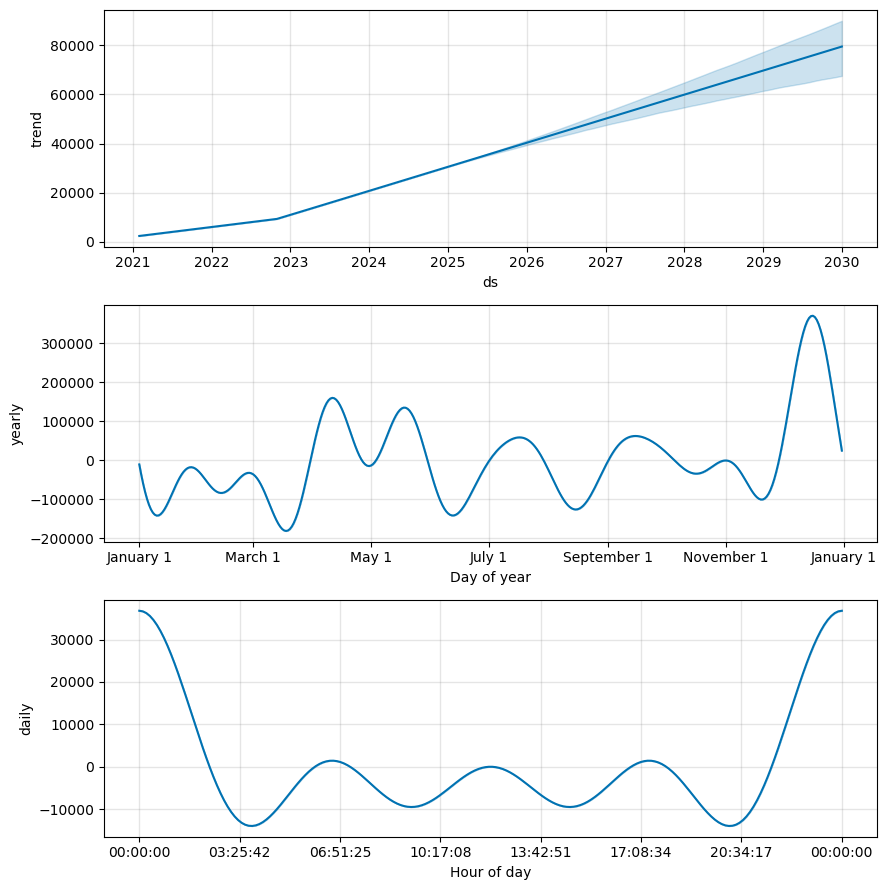

In [15]:
plot2 = m.plot_components(forecast)

In [16]:
forecast.to_csv('forecast.csv', index=False)